# 1、项目背景

数据来源：上海地区大众点评

主要属性：火锅店名、店铺网址、星级、大众点评数、平均价格、口味、环境、服务、特色菜系等

通过K均值聚类等方法，为客户筛选满足条件的火锅店、店铺网址、招牌菜

# 2、数据导入

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=[u'SimHei'] #正常显示图片中的中文字体
plt.rcParams['axes.unicode_minus']=False #解决图片中负号为方块的问题

%matplotlib inline

#读取数据
data=pd.read_csv('huoguo.csv',encoding='gb18030')
print(data.head())
len(data)
                                 

                   name                                     url   star  \
0       蜀城巷子老成都火锅(宜山路店)  http://www.dianping.com/shop/110269910  准五星商户   
1  旬野菜日本料理和牛寿喜锅专门店(浦东店)   http://www.dianping.com/shop/98281287   五星商户   
2       小肥羊(光启城时尚购物中心店)   http://www.dianping.com/shop/72351070  准五星商户   
3              薪火重庆本味火锅  http://www.dianping.com/shop/114858370  准五星商户   
4             蜀大侠(江宁路店)   http://www.dianping.com/shop/98763397   五星商户   

   comment  avg_price  taste  environment  services              recommend  
0      545        122    8.6          8.4       8.5           蜀城嫩鲜牛肉,毛肚,鸭血  
1      602        313    8.8          9.1       9.0  安格斯牛肉寿喜锅,刺身拼盘,澳洲和牛寿喜烧  
2     4308          1    9.0          8.9       8.9      特色羔羊肉,鸳鸯锅,招牌豪气羊肉串  
3      128         12    8.4          8.7       8.9       特色鲜鸭血,豚骨鸳鸯锅,现杀牛蛙  
4     1529        133    9.0          9.0       8.9       贵妃牛肉,大侠水牛毛肚,冰川鹅肠  


749

In [2]:
#删除含空值的行数据
data=data.dropna(axis=0,how='any')
data.head()

,name,url,star,comment,avg_price,taste,environment,services,recommend
0,蜀城巷子老成都火锅(宜山路店),http://www.dianping.com/shop/110269910,准五星商户,545,122,8.6,8.4,8.5,"蜀城嫩鲜牛肉,毛肚,鸭血"
1,旬野菜日本料理和牛寿喜锅专门店(浦东店),http://www.dianping.com/shop/98281287,五星商户,602,313,8.8,9.1,9.0,"安格斯牛肉寿喜锅,刺身拼盘,澳洲和牛寿喜烧"
2,小肥羊(光启城时尚购物中心店),http://www.dianping.com/shop/72351070,准五星商户,4308,1,9.0,8.9,8.9,"特色羔羊肉,鸳鸯锅,招牌豪气羊肉串"
3,薪火重庆本味火锅,http://www.dianping.com/shop/114858370,准五星商户,128,12,8.4,8.7,8.9,"特色鲜鸭血,豚骨鸳鸯锅,现杀牛蛙"
4,蜀大侠(江宁路店),http://www.dianping.com/shop/98763397,五星商户,1529,133,9.0,9.0,8.9,"贵妃牛肉,大侠水牛毛肚,冰川鹅肠"


In [3]:
#按平均价将店铺进行排序(升序)
import numpy as np
data=data.sort_values(by='avg_price',axis=0,ascending=True)
data.avg_price[data.avg_price==1]=111
for i in range(749):
    if(data.avg_price[i]>=10)&(data.avg_price[i]<=20):
        data.avg_price[i]=data.avg_price[i]+100
        
#按照评价将店铺进行排序（升序）
data.sort_values(by='comment',axis=0,ascending=True)
print(data)

                  name                                     url   star  \
511      川溢香老成都火锅(普陀店)  http://www.dianping.com/shop/110344972  准五星商户   
382       呷哺呷哺(白玉兰广场店)  http://www.dianping.com/shop/123243037   五星商户   
2      小肥羊(光启城时尚购物中心店)   http://www.dianping.com/shop/72351070  准五星商户   
62   红魔重庆美蛙火锅(宝山龙湖天街店)  http://www.dianping.com/shop/113075823   五星商户   
461       鼎尊锅物料理(斜土路店)   http://www.dianping.com/shop/19475700   五星商户   
..                 ...                                     ...    ...   
483     辉哥海鲜火锅(洛克外滩源店)    http://www.dianping.com/shop/6061978   五星商户   
104         洋房火锅(新天地店)    http://www.dianping.com/shop/8844957   五星商户   
49           季悦火锅(锦江店)   http://www.dianping.com/shop/43386343   五星商户   
217         洋房火锅(岳阳路店)    http://www.dianping.com/shop/4663518   五星商户   
452       季悦火锅(虹桥迎宾馆店)   http://www.dianping.com/shop/21245919   五星商户   

     comment  avg_price  taste  environment  services  \
511     1539        111    8.9          9.0       9.0   
382      

C:\Users\19152\AppData\Local\Temp/ipykernel_10412/3087640262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.avg_price[data.avg_price==1]=111
C:\Users\19152\AppData\Local\Temp/ipykernel_10412/3087640262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.avg_price[i]=data.avg_price[i]+100


In [4]:
data[(data.comment>=10)&(data.comment<=20)].comment
for i in range(749):
    if(data.comment[i]>=10)&(data.comment[i]<=20):
        data.comment[i]=data.comment[i]+100

C:\Users\19152\AppData\Local\Temp/ipykernel_10412/2414013244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.comment[i]=data.comment[i]+100


# 3、数据可视化及分析

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


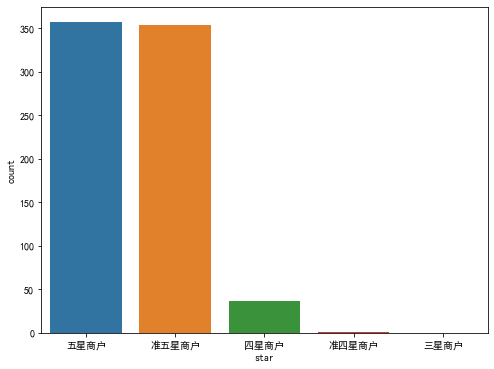

In [5]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.family']=['sans-Serif']
plt.figure(figsize=(8,6))
sns.countplot(data["star"],order=['五星商户','准五星商户','四星商户','准四星商户','三星商户'])

#绘制计数柱状图
plt.show()

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


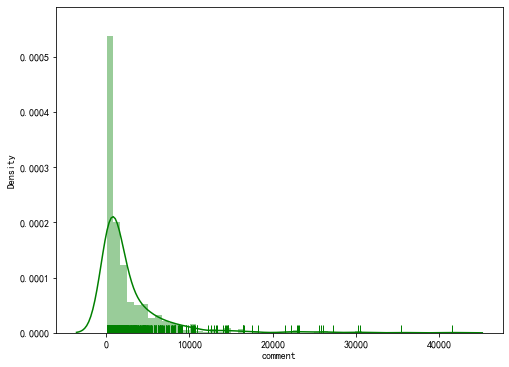

In [6]:
#评论数情况
plt.figure(figsize=(8,6))
#绘制直方图，并生成kde曲线
sns.distplot(data["comment"],kde=True,rug=True,color='g')
plt.show()

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


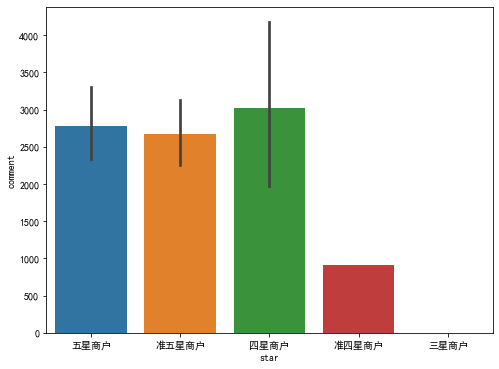

In [7]:
#星级和评论的关系
plt.figure(figsize=(8,6))
#绘制箱型图
sns.barplot(data["star"],y=data["comment"],order=['五星商户','准五星商户','四星商户','准四星商户','三星商户'])
plt.show()

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


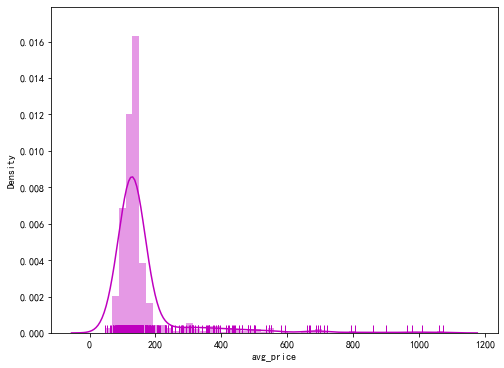

In [8]:
#人均消费
plt.figure(figsize=(8,6))
sns.distplot(data["avg_price"],kde=True,rug=True,color='m')
plt.show()

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


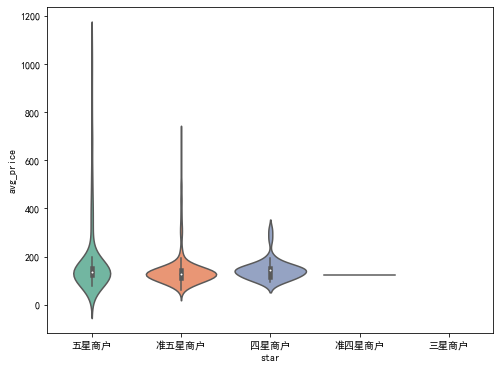

In [9]:
#价格和星级
plt.figure(figsize=(8,6))
#绘制小提琴图
sns.violinplot(data["star"],y=data["avg_price"],palette="Set2",order=['五星商户','准五星商户','四星商户','准四星商户','三星商户'])
plt.show()

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 576x432 with 0 Axes>

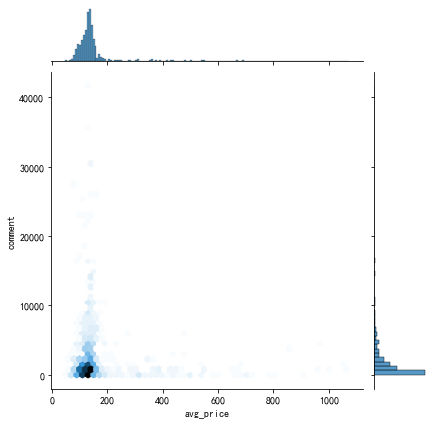

In [10]:
#价格和评论数量
plt.figure(figsize=(8,6))
#绘制综合散点图
sns.jointplot(data["avg_price"],data["comment"],kind="hex")
plt.show()

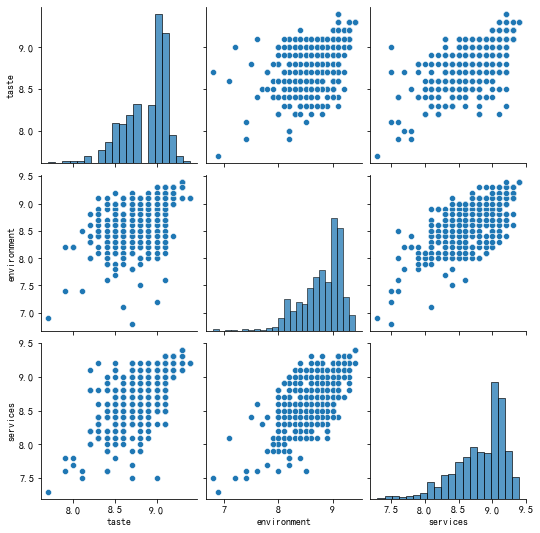

In [11]:
#口味、环境、服务、星级相关性分析
import seaborn as sns
df=data[['star','taste','environment','services']]
sns.pairplot(df)

<Figure size 1080x1080 with 0 Axes>

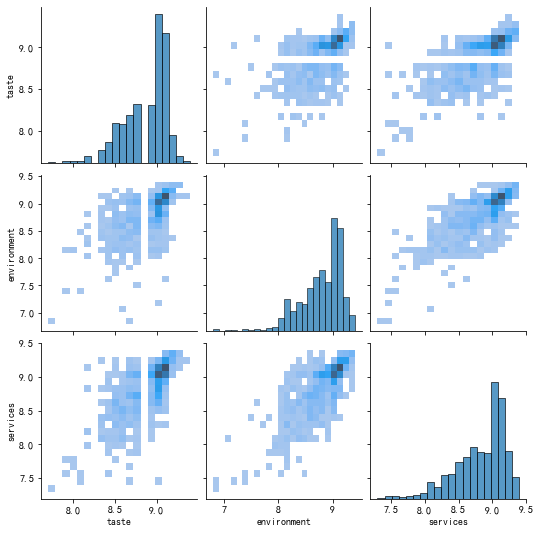

In [12]:
plt.figure(figsize=(15,15))
df=data[['taste','environment','services']]
sns.pairplot(df,palette="Set2",kind="hist")
plt.show()

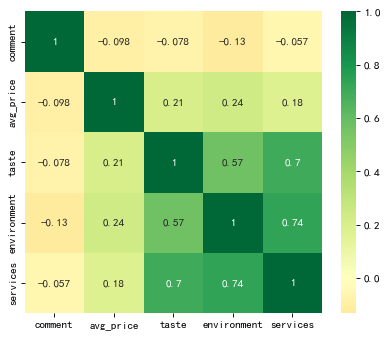

In [13]:
#通过绘制热力图分析影响火锅人均价格的因素
def heatmap(newdata,method='pearson',camp='RdYlGn',figsize=(10,8)):
    plt.figure(figsize=figsize,dpi=80)
    sns.heatmap(data.corr(method=method),
            xticklabels=data.corr(method=method).columns,
            yticklabels=data.corr(method=method).columns,cmap=camp,center=0,annot=True)
heatmap(data,figsize=(6,5))

# 4、特色菜推荐

In [14]:
#特色菜
import pandas as pd
import jieba
jieba.load_userdict("火锅菜.txt")

#添加火锅菜的专业词汇
delicious=[]
for i in range(750):
    try:
        recommend=jieba.lcut(data['recommend'][i])
        while ',' in recommend:
            recommend.remove(',')
        while '(' in recommend:
            recommend.remove('(')
        while ')' in recommend:
            recommend.remove(')')
        delicious.extend(recommend)
    except:
        continue
    print(recommend)
delicious = pd.value_counts(delicious)
print('每个词出现的个数如下所示：')
print("delicious:",delicious)

from pyecharts.charts.wordcloud import WordCloud
wordcloud=WordCloud(width=1000,height=600)
wordcloud.add('',delicious.index,delicious.values,word_size_range=[15,150])
wordcloud.render("推荐菜.html")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\19152\AppData\Local\Temp\jieba.cache
Loading model cost 0.618 seconds.
Prefix dict has been built successfully.


['蜀', '城嫩鲜', '牛肉', '毛肚', '鸭血']
['安格斯', '牛肉', '寿喜锅', '刺身', '拼盘', '澳洲', '和', '牛寿喜', '烧']
['特色', '羔羊', '肉', '鸳鸯锅', '招牌', '豪气', '羊肉串']
['特色', '鲜', '鸭血', '豚', '骨', '鸳鸯锅', '现杀', '牛蛙']
['贵妃', '牛肉', '大侠', '水牛', '毛肚', '冰川', '鹅肠']
['贵妃', '牛肉', '大侠', '水牛', '毛肚', '红糖', '糍粑']
['ipa', '青岛', '啤酒', '庭涛', '烧肉', '五种', '组合', '刺身']
['翠玉', '无骨', '牛肉', '上', '选松阪', '猪肉', '鴨', '血豆腐']
['渝利', '蟹肉', '棒', '渝利', '秘制', '午餐肉', '渝利', '手工', '虾滑']
['斑鱼', '大', '锅底', '凉拌', '鱼皮', '菌菇', '拼盘']
['一品', '嫩', '鲶鱼', '九九', '秘制鹅肠', '冰镇', '毛肚']
['九记', '清汤', '腩', '净食', '浓汤', '花胶', '鸡锅', '脆皮', '炸', '大肠']
['活', '斑鱼', '拌', '鱼皮', '斑', '鱼汤', '底']
['花膠', '鸡锅', '脆肉', '鯇', '魚', '鲍汁', '鸭脚', '扎']
['蓉城', '钵', '钵', '鸡', '泼辣', '鲶鱼', '干锅', '牛蛙']
['牛肉', '组合', '拌', '猪皮', '大', '酱汤']
['毛肚', '招牌', '嫩', '牛肉', '鲜活', '豆苗']
['红魔', '招牌', '辣蛙', '自制', '芝士', '虾滑', '点蛙', '赠', '招牌', '麻辣', '鸳鸯']
['美蛙', '冰镇', '脆', '毛肚', '竹荪', '虾滑']
['吊', ' ', '龙', '生打', '牛肉丸', '雪花', '牛肉']
['红魔', '招牌', '辣蛙', '自制', '芝士', '虾滑', '脆嫩', '毛肚']
['宫廷', '鲍翅', '浓', '汤锅', '招牌', '蛤蜊', '龙虾', '

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "E:\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


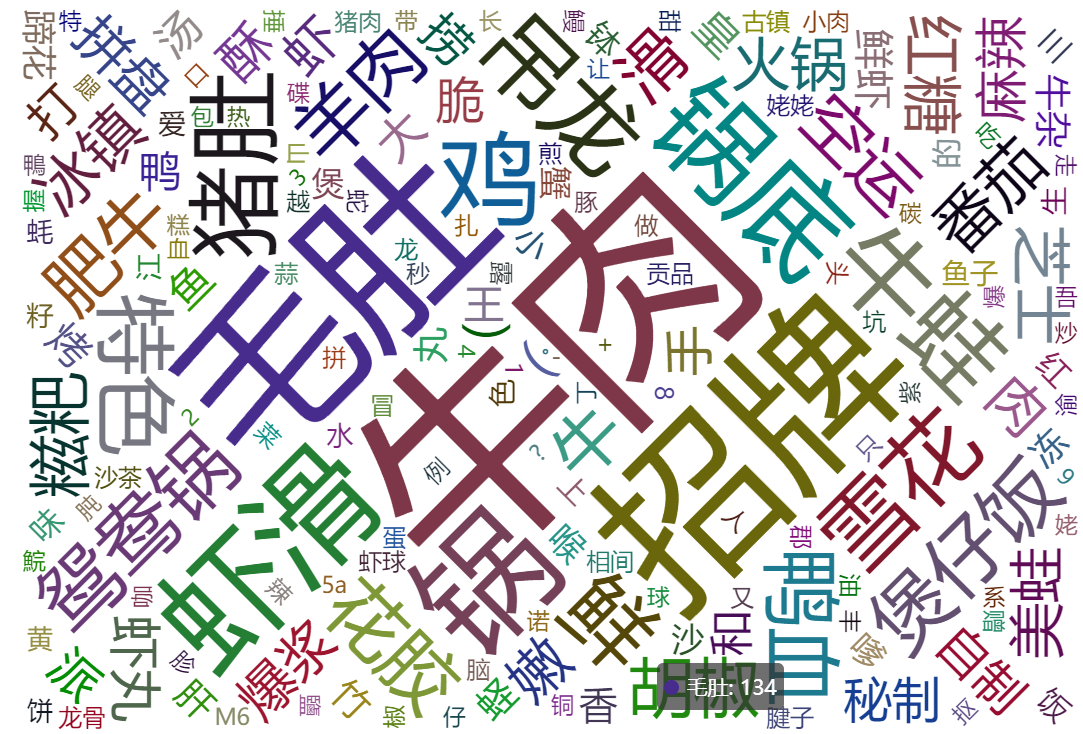

# 5、K均值聚类分析

In [15]:
from sklearn.cluster import KMeans

#将星级转换成数字
for i in range(750):
    try:
        if data.loc[i,'star']=='五星商户':
            data.loc[i,'star_score']=5
        elif data.loc[i,'star']=='准五星商户':
            data.loc[i,'star_score']=4.5
        elif data.loc[i,'star']=='四星商户':
            data.loc[i,'star_score']=4
        elif data.loc[i,'star']=='准四星商户':
            data.loc[i,'star_score']=3.5
        else:
            data.loc[i,'star_score']=3
    except:
        continue

#构造聚类器
estimator = KMeans(n_clusters=3)
data_1 = data[['star_score','taste','environment','services']]
estimator.fit(data_1)

#聚类
label_pred = estimator.labels_

#获取聚类标签
print("labels_pred:",label_pred)

labels_pred: [1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 2 2 2 1 0 0 0 0 2 0 2 1 0 1
 1 0 1 2 2 1 0 0 2 2 0 2 1 1 1 1 2 0 0 1 2 1 0 1 0 0 1 0 1 1 0 1 1 0 0 2 1
 1 0 0 2 0 1 1 2 0 0 1 0 1 2 1 0 1 0 2 2 0 2 0 0 1 1 0 1 1 1 1 0 2 2 1 1 1
 1 0 1 0 0 1 1 2 0 0 1 1 0 0 1 2 1 1 0 0 2 2 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1
 2 1 0 1 2 0 0 1 0 0 0 2 1 1 0 1 0 1 1 1 2 2 2 2 1 0 1 1 0 1 1 1 0 0 1 1 1
 0 0 2 0 1 1 1 1 0 2 0 1 0 0 1 1 1 0 2 2 2 1 0 2 0 0 2 2 0 1 1 1 1 0 2 1 0
 0 1 2 0 1 1 1 1 1 0 0 1 2 0 1 1 0 1 0 2 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0
 0 1 1 1 2 0 2 2 0 1 1 0 2 1 0 2 0 0 0 0 1 1 1 2 2 1 1 0 2 1 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 2 1 1 0 0 1 1 0 1 2 2 0 1 0 1 1 0 0 2 1 1 0 0 0 0 2 1 1 1 1
 0 0 0 1 0 0 2 2 1 1 0 2 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 2 2 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 2 0 2 1 0 0 0 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 2 1 1 0 1 0 0 1 2 0 0 0 0
 0 0 1 0 2 1

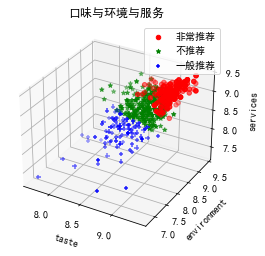

In [16]:
#获取聚类中心
centroids=estimator.cluster_centers_
inertia=estimator.inertia_

#获取聚类准则的总和
#绘制k-means结果(通过taste\environment\services三者聚类)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
x0=data_1[label_pred==0]
x1=data_1[label_pred==1]
x2=data_1[label_pred==2]
ax.scatter(x0['taste'],
          x0['environment'],
          x0['services'],
          c="red",
          marker='o',
          label='非常推荐')
ax.scatter(x1['taste'],
          x1['environment'],
          x1['services'],
          c="green",
          marker='*',
          label='不推荐')
ax.scatter(x2['taste'],
          x2['environment'],
          x2['services'],
          c="blue",
          marker='+',
          label='一般推荐')
ax.set_xlabel('taste')
ax.set_ylabel('environment')
ax.set_zlabel('services')
plt.legend()

plt.title('口味与环境与服务')
plt.show()

# 6、智能推荐器

In [17]:
#制作推荐火锅的APP
data['label']=label_pred
tuijian=data[data['label']==2]
#先筛选出标签为非常推荐的所有商户
print("tuijian:",tuijian)

tuijian:                      name                                     url   star  \
692             肥妈正宗澳门猪骨煲  http://www.dianping.com/shop/123906313   四星商户   
620            钱家·乔老爷铜锅涮肉   http://www.dianping.com/shop/59033430  准五星商户   
658     颐品居热气羊肉馆(乌鲁木齐中路店)     http://www.dianping.com/shop/579409   四星商户   
724    八道湾热气羊肉羊蝎子火锅(三钢里店)   http://www.dianping.com/shop/18526090  准五星商户   
643  钢管厂五区小郡肝串串香火锅(南京西路店)  http://www.dianping.com/shop/121936410   四星商户   
..                    ...                                     ...    ...   
301            777排档火锅·鸿馆  http://www.dianping.com/shop/112295600  准五星商户   
625                香港蛟龙过海  http://www.dianping.com/shop/113121124   四星商户   
373           甘草潮菜馆(海宁路店)   http://www.dianping.com/shop/21121315  准五星商户   
695              香港燚丰海鲜火锅   http://www.dianping.com/shop/95882659  准五星商户   
706       虹村正宗潮汕打边炉(合川路店)    http://www.dianping.com/shop/2180695  准五星商户   

     comment  avg_price  taste  environment  services  \
692       40        1

In [19]:
#根据输入条件推荐店铺
star_demand=float(input('最低星级要求(5/4.5/4):'))
avg_price_low=int(input('人均消费下限:'))
avg_price_high=int(input('人均消费上限:'))
tas=float(input('最低口味分数：'))
envir=float(input('最低环境分数:'))
serv=float(input('最低服务分数:'))
special_dish=input('想吃的特色菜：')
comment=[]
taste=[]
environment=[]
services=[]
recommend=[]
print("符合您条件的火锅店铺已为您挑选出来：——-------")
tj=tuijian[(tuijian['star_score']>=star_demand)&(tuijian['avg_price']>avg_price_low)&(tuijian['avg_price']<avg_price_high)&(tuijian['taste']>tas)&
           (tuijian['environment']>envir)&(tuijian['services']>serv)].reset_index()
#print(tj)

for i in range(len(tj)):
    if special_dish in tj['recommend'][i]:
        a=tj['recommend'][i].split(",")
        for j in a:
            if special_dish in j:
                test=j
            print('火锅店名为:{},该店的特色菜为:{},店铺网址为：{}'.format(tj['name'][i],test,tj['url'][i]))
            print()
            comment.append(tj['comment'][i])
            taste.append(tj['taste'][i])
            environment.append(tj['environment'][i])
            services.append(tj['services'][i])
            

最低星级要求(5/4.5/4):4
人均消费下限:50
人均消费上限:200
最低口味分数：7
最低环境分数:7
最低服务分数:7
想吃的特色菜：花胶
符合您条件的火锅店铺已为您挑选出来：——-------
火锅店名为:那都不是锅港式打边炉(浦东巴黎春天店),该店的特色菜为:养颜花胶鸡,店铺网址为：http://www.dianping.com/shop/125719960

火锅店名为:那都不是锅港式打边炉(浦东巴黎春天店),该店的特色菜为:养颜花胶鸡,店铺网址为：http://www.dianping.com/shop/125719960

火锅店名为:那都不是锅港式打边炉(浦东巴黎春天店),该店的特色菜为:养颜花胶鸡,店铺网址为：http://www.dianping.com/shop/125719960

火锅店名为:那都不是锅港式打边炉(鹿都商业广场店),该店的特色菜为:养颜花胶鸡,店铺网址为：http://www.dianping.com/shop/126020267

火锅店名为:那都不是锅港式打边炉(鹿都商业广场店),该店的特色菜为:养颜花胶鸡,店铺网址为：http://www.dianping.com/shop/126020267

火锅店名为:那都不是锅港式打边炉(鹿都商业广场店),该店的特色菜为:养颜花胶鸡,店铺网址为：http://www.dianping.com/shop/126020267

火锅店名为:锅涨涨港式打边炉(川沙旗舰店),该店的特色菜为:港式金牌花胶鸡,店铺网址为：http://www.dianping.com/shop/126639026

火锅店名为:锅涨涨港式打边炉(川沙旗舰店),该店的特色菜为:港式金牌花胶鸡,店铺网址为：http://www.dianping.com/shop/126639026

火锅店名为:锅涨涨港式打边炉(川沙旗舰店),该店的特色菜为:港式金牌花胶鸡,店铺网址为：http://www.dianping.com/shop/126639026

火锅店名为:那都不是锅港式打边炉(呼玛店),该店的特色菜为:港式金牌花胶鸡,店铺网址为：http://www.dianping.com/shop/124557764

火锅店名为:那都不是锅港式打边炉(呼玛店),该店的特色菜为:港式金牌花胶鸡,店铺网址为：